<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Client behavior classification in Banking**


The purpose of this lab is to master classification clients in banking for machine learning models.

After completing this lab you will be able to:

1. preprocess (normilize and transform categorical data) and create DataSet
2. features selection
3. make classification of clients
4. visualize decision tree of classification model  


## Outline


* Materials and Methods
* General Part
  * Import Libraries
  * Load the Dataset
  * Data preparation
      * Data transformation
      * Encoding and Normalization
  * Features selection
      * Chi-Squared Statistic
      * Mutual Information Statistic
      * Feature Importance
      * Correlation Matrix with Heatmap
  * Classification models
      * Train and Test DataSets creation
      * Extra Trees Classifier
      * Logistic regression 
  * Decision tree 
      * Build model
      * Visualization of decision tree
* Tasks
* Authors


----


## Materials and Methods


The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

> This dataset is public available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

During the work, the task of a preliminary analysis of a positive response (term deposit) to direct calls from the bank is solved. In essence, the task is the matter of bank scoring, i.e. according to the characteristics of clients (potential clients), their behavior is predicted (loan default, a wish to open a deposit, etc.).

In this lesson, we will try to give answers to a set of questions that may be relevant when analyzing banking data:

1. What are the most useful Python libraries for classification analysis?
2. How to transform category data?
3. How to create DataSet?
4. How to do features selection?
5. How to make, fit and visualize classification model?

In addition, we will make the conclusions for the obtained results of our classification analysis to plan marketing banking campaigns more effectively.


[Scikit-learn](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01) (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.


In [1]:
# conda install scikit-learn==0.24.2

## Import Libraries


Download data using a URL.


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2023-08-27 17:48:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip’

bank-additional.zip     [  <=>               ] 434.15K  1.37MB/s    in 0.3s    

2023-08-27 17:48:32 (1.37 MB/s) - ‘bank-additional.zip’ saved [444572]



Alternative URL for the dataset downloading.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VDA_Banking_L2/bank-additional.zip

--2023-08-27 17:48:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VDA_Banking_L2/bank-additional.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/zip]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K  --.-KB/s    in 0.01s   

2023-08-27 17:48:48 (39.3 MB/s) - ‘bank-additional.zip.1’ saved [444572/444572]



Unzipping to a folder. It is a good idea to apply the `-o` and `-q`  when unzipping to quiet the process and overwrite any existing folders.


In [4]:
!unzip -o -q bank-additional.zip

Import the libraries necessary to use in this lab. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots. Ignore the warnings.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
# Classificators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# warnings deactivate
import warnings
warnings.filterwarnings('ignore')

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by it

Further specify the value of the `precision` parameter equal to 2 to display two decimal signs (instead of 6 as default).


In [6]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

## Load the Dataset


We will use the same DataSet like in previous labs. Therefore next some steps will be the same


In [7]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [8]:
df.shape

(41188, 21)

As you can see DataSet consist 21 columns. Last column - target. Also DataSet consist 41188 rows. In previous labs we investigated these columns. 


<details>
<summary><b>Click to see attribute information</b></summary>
Input features (column names):

1. `age` - client age in years (numeric)
2. `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3. `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4. `education` - client education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5. `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6. `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7. `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8. `contact` - contact communication type (categorical: `cellular`, `telephone`)
9. `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`) 
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`) 
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed for this client during this campaign (numeric, includes last contact) 
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted) 
14. `previous` - number of contacts performed for this client before this campaign (numeric) 
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric) 
17. `cons.price.idx` - consumer price index, monthly indicator (numeric) 
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric) 
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric) 
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)
</details>


Our goal is create the classification model that can predict  if the client will subscribe a term deposit or no? To do this we must analize and prepare data for such type of model.


## Data preparation


### Data transformation


First of all we should investigate how pandas recognized types of features


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

As you can see all categorical features was recogized like object. We must change thair type on "categorical". 


In [10]:
col_cat = list(df.select_dtypes(include=['object']).columns)
col_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

Let's look at the dataset size.


In [11]:
df.loc[:, col_cat] = df[col_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

To see the unical values of exact feature (column) we can use:


In [12]:
df['job'].unique()

['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

As was signed earlier the dataset contains 41188 objects (rows), for each of which 21 features are set (columns), including 1 target feature (y). 11 features, including target are categorical. These data type of values cannot use for classification. We must transform it to int or float. 
To do this we can use **[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)** and **[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)**. These functions can encode categorical features as an integer array.

Firs of all we separate DataSet on input and output(target) DataSets


In [13]:
X = df.iloc[:,:-1]  #input columns
y = df.iloc[:,-1]    #target column 

### Encoding and Normalization


Than create list of categorical fields and transform thair values to int arrays: (Replace ##YOUR CODE GOES HERE## with your Python code.)


In [16]:
col_cat = list(X.select_dtypes(include=['category']).columns)
oe = OrdinalEncoder()
oe.fit(X[col_cat])
X_cat_enc = oe.transform(X[col_cat])

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
col_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
Or

col_cat = list(X.select_dtypes(include=['category']).columns)
    
    </code>
</details>


In [18]:
X_cat_enc

array([[3., 1., 0., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       ...,
       [5., 1., 6., ..., 7., 0., 1.],
       [9., 1., 5., ..., 7., 0., 1.],
       [5., 1., 5., ..., 7., 0., 0.]])

Than we must transform arrays back into DataFrame:


In [19]:
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat
X_cat_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...
41183,5.00,1.00,5.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00
41184,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00
41185,5.00,1.00,6.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00
41186,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00


Numerical fields can have different scale and can consists negative values. These will lead to round mistakes and exeptions for some AI methods. To avoid it these features must be normalized.

Let's create list of numerical fields and normilize it using by **[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)**


In [20]:
col_num =['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_enc = scaler.fit_transform(X[col_num])

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
col_num = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
    </code>
</details>


In [21]:
X_num_enc

array([[0.48148148, 0.05307035, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.03029687, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.04595364, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.08932215,
        0.        ]])

Like in previous case transform back obtained arrays into DataFrame


In [22]:
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num
X_num_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.48,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
1,0.49,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
2,0.25,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
3,0.28,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
4,0.48,0.06,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
...,...,...,...,...,...,...,...,...,...,...
41183,0.69,0.07,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41184,0.36,0.08,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41185,0.48,0.04,0.02,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41186,0.33,0.09,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00


Than we should concatenate these DataFrames in one input DataFrame


In [23]:
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
x_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.48,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00,0.49,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00,0.25,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.28,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00,0.48,0.06,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5.00,1.00,5.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,0.69,0.07,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41184,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,0.36,0.08,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41185,5.00,1.00,6.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,0.48,0.04,0.02,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41186,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,0.33,0.09,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00


<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
    </code>
</details>



The same transformation we must do for target field


In [24]:
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
y_enc = pd.Series(y_enc)
y_enc.columns = y.name

In [25]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: category
Categories (2, object): ['no', 'yes']

In [26]:
y_enc

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Length: 41188, dtype: int64

As you can see values 'no' was changed on 0, 'yes' on 1


## Features selection


As was signed before input fields consists 20 features. Of coure some of them are more significant for classification. 

There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

They are:

* Chi-Squared Statistic.
* Mutual Information Statistic.

Let’s take a closer look at each in turn.

To do this we can use **[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)**


### Chi-Squared Statistic


Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

You can learn more about this statistical test in the tutorial:

[A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)
The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

The scikit-learn machine library provides an implementation of the chi-squared test in the **[chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01#sklearn.feature_selection.chi2)** function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

For example, we can define the SelectKBest class to use the chi2() function and select all (or most significant) features, then transform the train and test sets.


Apply SelectKBest class to extract top 10 best features


In [27]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

concat two dataframes for better visualization 


In [28]:
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs  Score
18     euribor3m 890.69
6           loan 547.96
15  emp.var.rate 541.30
19   nr.employed 502.66
14      poutcome 441.45
11      campaign 358.02
3      education 321.92
2        marital 167.61
13      previous 157.98
9    day_of_week  98.23


### Mutual Information Statistic


Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

[You can learn more about mutual information in the following tutorial.](https://machinelearningmastery.com/information-gain-and-mutual-information?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the **[mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01#sklearn.feature_selection.mutual_info_classif)** function.

Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).


In [29]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs  Score
11        campaign   0.08
18       euribor3m   0.07
17   cons.conf.idx   0.07
16  cons.price.idx   0.07
19     nr.employed   0.06
15    emp.var.rate   0.06
13        previous   0.04
9      day_of_week   0.03
7          contact   0.03
14        poutcome   0.02


<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
    </code>
</details>




As you can see these 2 function select different significant features.


### Feature Importance


You can get the feature importance of each feature of your DataFrame by using the feature importance property of the exact classification model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
For example:
Feature importance is an inbuilt class that comes with **[Tree Based Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)**, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.


Let's create and fit the model:


In [30]:
model = ExtraTreesClassifier()
model.fit(x_enc,y_enc)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

use inbuilt class feature_importances of tree based classifiers


In [31]:
print(model.feature_importances_)

[0.05776139 0.03530656 0.05343606 0.01024515 0.0264767  0.01956753
 0.01202452 0.01247368 0.04743788 0.03279334 0.08854105 0.26829365
 0.05836369 0.04656798 0.01123333 0.01807201 0.02373366 0.03304893
 0.10173515 0.04288775]


Let's transform it into Series and plot graph of feature importances for better visualization


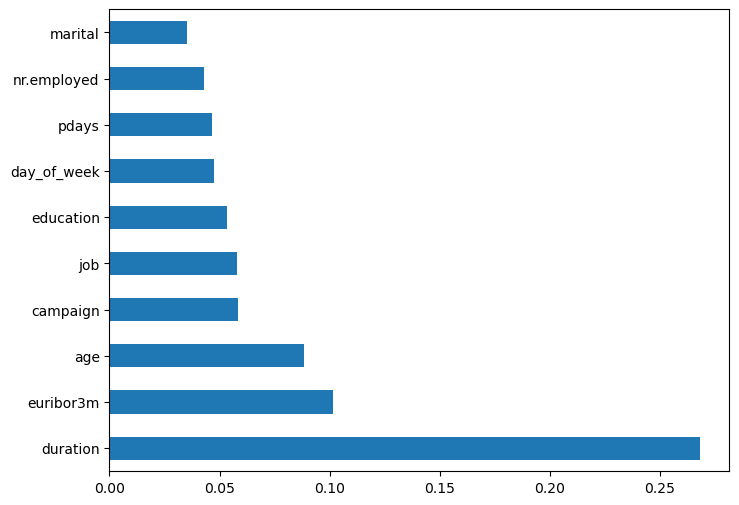

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

You can see that for Extra Tree Classifier impotance of features are different than in previous cases. It means that there are not exact rules for features selection. And their impotance strictly depedence on model.


### Correlation Matrix with Heatmap


Correlation states how the features are related to each other.
Correlation can be positive (increase in one value of feature increases the value of the other variable) or negative (increase in one value of feature decreases the value of the other variable)
Heatmap makes it easy to identify which features are most related to the other variable, we will plot heatmap of correlated features using the seaborn library.


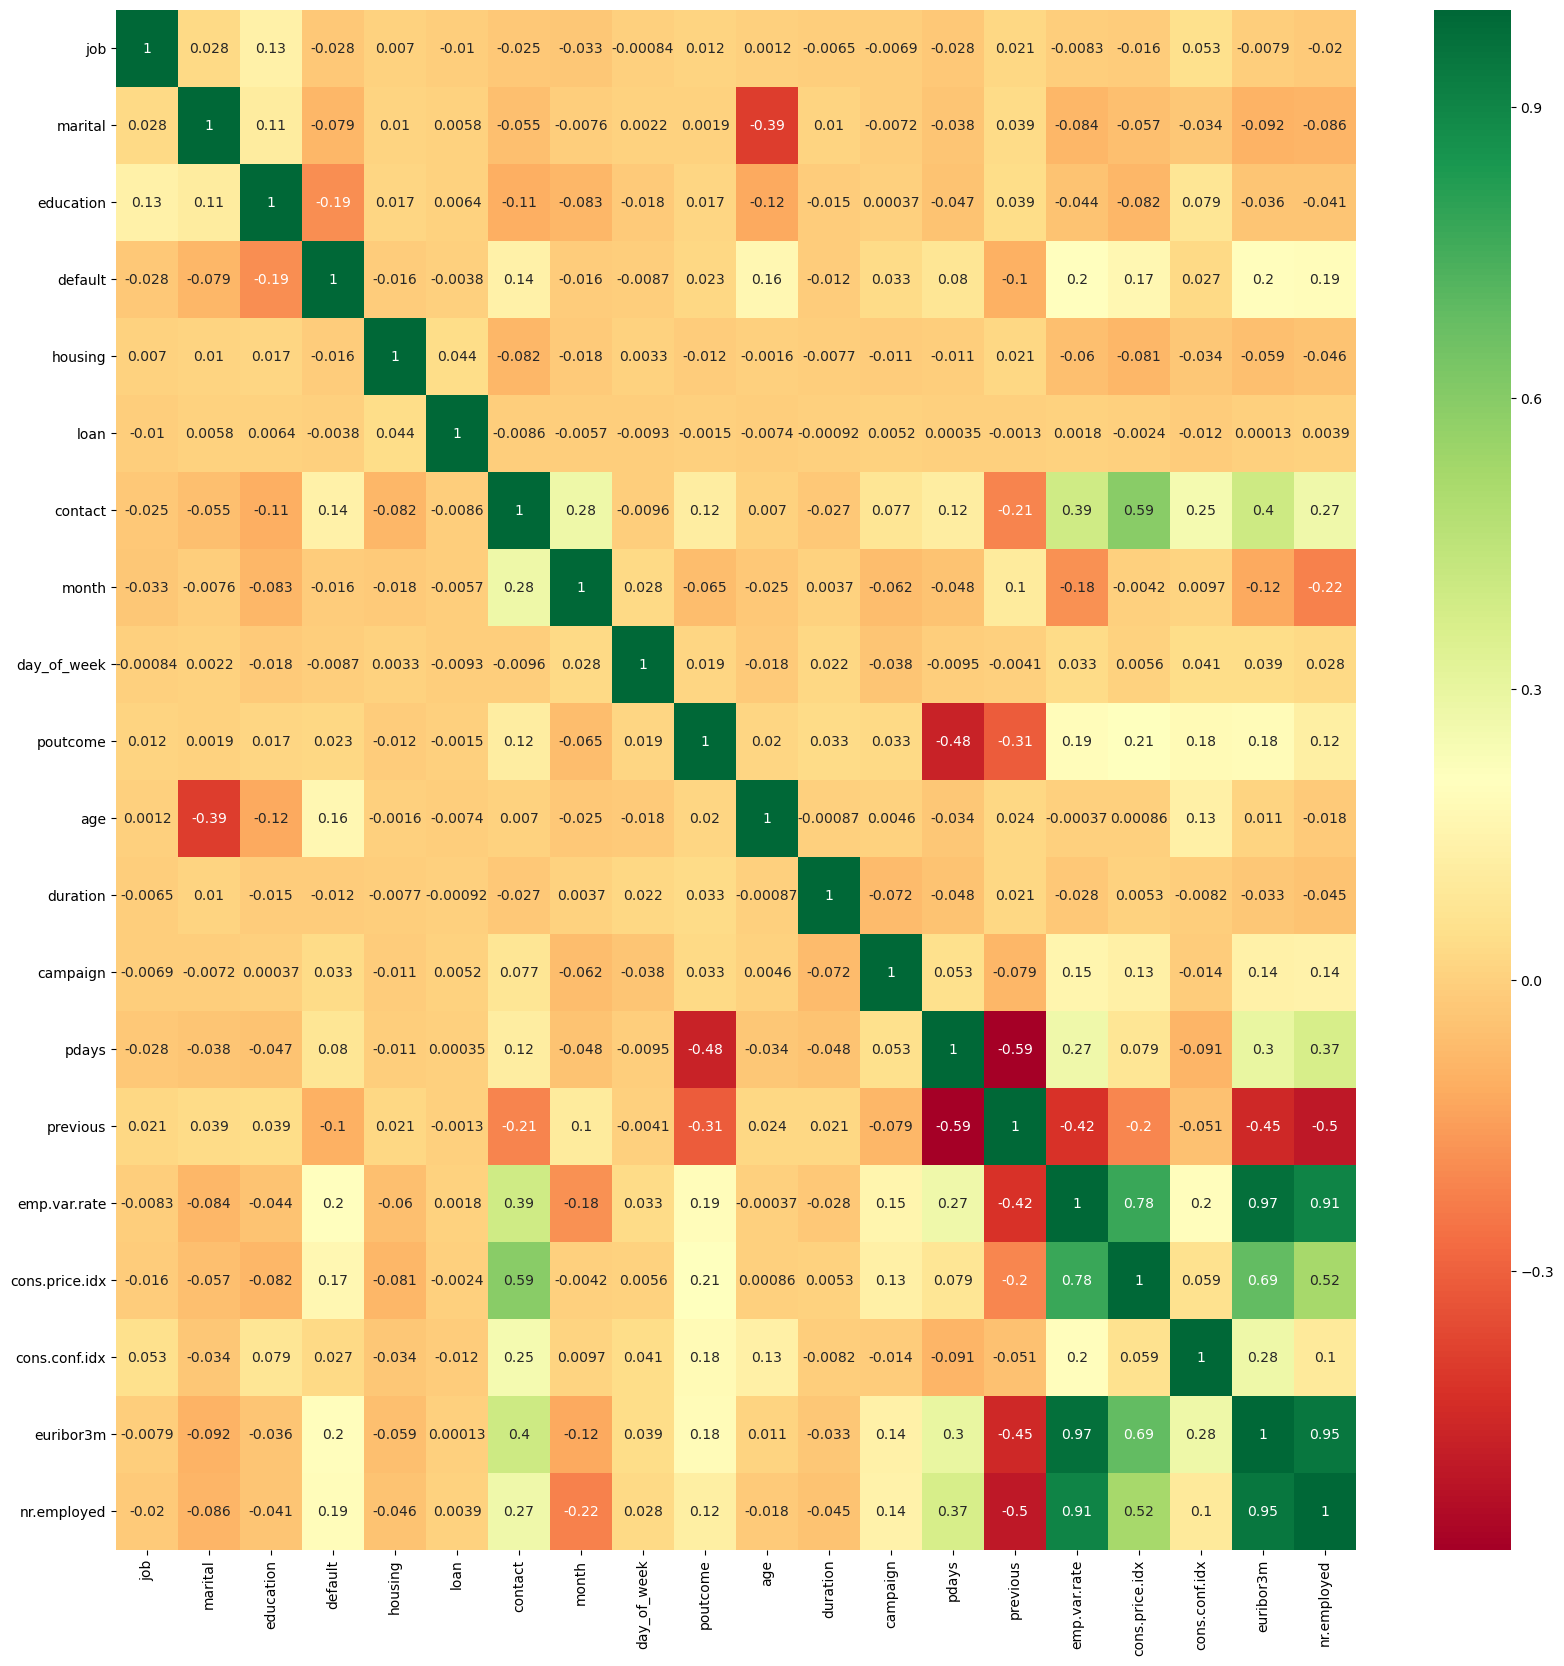

In [33]:
corrmat = x_enc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(x_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

As you can see fields 'euribor3m', 'emp.var.rate', 'nr.employed' strictly correlate each other. It mean that two of them must be removed from calculation because there are linear depedencies between them. If we know one of them we can easy calculate another two. Let's  remove 'emp.var.rate' and 'nr.employed'


In [34]:
col = x_enc.columns
col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [35]:
col =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m']

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m']
    </code>
</details>




In [36]:
x_enc = x_enc[col]

## Classification models


### Train and Test DataSets creation


First of all we must separate DataSets for train and test DataSets for calculate accuracy of models. To do this we can use **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)**. Let's separate DataSets in 0.33 proportion train/test


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.33, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (27595, 18)
X_test: (13593, 18)
y_train: (27595,)
y_test: (13593,)


You can see that Train DataSets consists 27595 rows. Test - 13593


### Extra Trees Classifier


Let's create and fit ExtraTreesClassifier on train DataSet and calculate accuracy of classification:


In [38]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Evaluate the model on test data for obtain predictions


In [39]:
yhat = model.predict(X_test)
print(yhat)

[0 0 0 ... 0 0 0]


Evaluate accuracy: 


In [40]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.33


### Logistic regression 


As you can see Accuracy of this model is very good.

There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use?

A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

**[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)** is a good model for testing feature selection methods as it can perform better if irrelevant features are removed from the model. We will use this model in absolutelly similar way like previous one.


In [41]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.02


<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
    </code>
</details>


As you can see accuracy is little better


## Decision tree


### Build model


As shown, the previous methods have high accuracy. However, the biggest drawback is the inability to visualize or justify the decision.


Decision trees are a popular supervised learning method for a variety of reasons. Benefits of decision trees include that they can be used for both regression and classification, they don’t require feature scaling, and they are relatively easy to interpret as you can visualize decision trees. This is not only a powerful way to understand your model, but also to communicate how your model works. Consequently, it would help to know how to make a visualization based on your model.


A **[Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)** is a supervised algorithm used in machine learning. It is using a binary tree graph (each node has two children) to assign for each data sample a target value. The target values are presented in the tree leaves. To reach to the leaf, the sample is propagated through nodes, starting at the root node. In each node a decision is made, to which descendant node it should go. A decision is made based on the selected sample’s feature. Decision Tree learning is a process of finding the optimal rules in each internal tree node according to the selected metric.


This metod allows also to calculate features impotance.
Let's calculate them. Choice best 10 of them. Refit the model and visualize decision tree.


In [42]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.98


<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
    </code>
</details>



In [43]:
print("Features impotance:", model.feature_importances_)

Features impotance: [0.04554313 0.02477389 0.03876764 0.00706648 0.01848184 0.01447345
 0.00782709 0.0172519  0.0352156  0.02233879 0.09588892 0.34750314
 0.0317008  0.01621642 0.00997898 0.01484686 0.03492866 0.21719641]


Plot graph of feature importances for better visualization


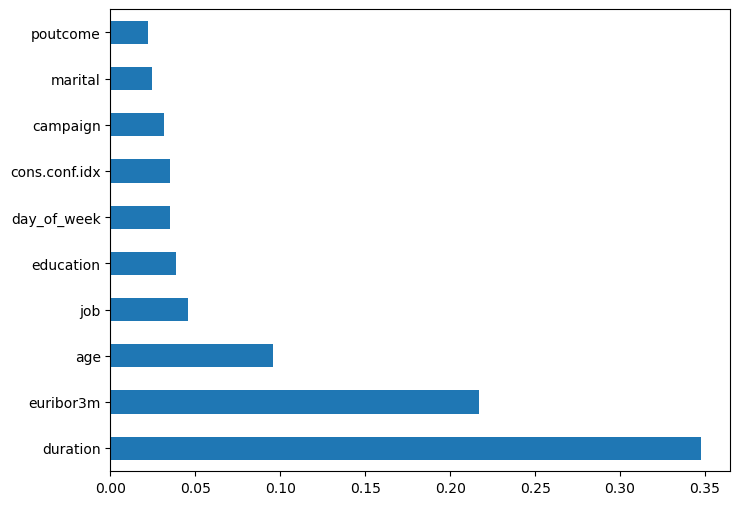

In [44]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Choice 10 most important:


In [45]:
feat_importances.nlargest(10)

duration        0.35
euribor3m       0.22
age             0.10
job             0.05
education       0.04
day_of_week     0.04
cons.conf.idx   0.03
campaign        0.03
marital         0.02
poutcome        0.02
dtype: float64

Create list of features


In [46]:
col = feat_importances.nlargest(10).index
col

Index(['duration', 'euribor3m', 'age', 'job', 'education', 'day_of_week',
       'cons.conf.idx', 'campaign', 'marital', 'poutcome'],
      dtype='object')

Let's refit the model on most important features


In [53]:
X_train_dt = X_train[col]
X_test_dt = X_test[col]
model.fit(X_train_dt, y_train)
yhat = model.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 89.01


As you can see Accuracy is little worse, because we don't use all features.


### Visualization of decision tree


Let's visualize decision tree.
There are some ways to do it. 


### _Text visualization_


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

text_representation = tree.export_text(model)
print(text_representation)

ImportError: cannot import name 'export_text' from 'sklearn.tree.export' (/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/export.py)

You can save it into file:


In [49]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

NameError: name 'text_representation' is not defined

### _Plot tree_


You can plot tree using by two different way:


**[plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)** (slow render - this can take some time): 


In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
               feature_names = col, 
               class_names = y.unique(),
               filled = True)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

<Figure size 2500x2000 with 0 Axes>

In [ ]:
fig.savefig('decision_tree.png')

Or you can use **[python-graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)** library. This is more fast function


In [67]:
# conda install python-graphviz

In [71]:
!pip install graphviz

import graphviz
dot_data = tree.export_graphviz(model,
               feature_names = col, 
               class_names = y.unique(),
               filled=True)

NotFittedError: This ABCMeta instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

After creation you can draw graph


In [72]:
graph = graphviz.Source(dot_data, format="png") 
graph

NameError: name 'dot_data' is not defined

And render it into file:


In [ ]:
graph.render("decision_tree_graphivz")

## Conclusions


In this lab we learned to do preliminary data processing. In particular, change data types, normalize and process categorical data. It was shown how to make feature selection by different methods. Learned how to build training and test DataSets. Shows how to work with different classifiers. It was also shown how to visualize a decision tree.
As a result of lab it was shown how on the basis of a statistical database predict  if the client will subscribe a term deposit or no.

The accuracy of decision was abot 90%. 


## Tasks


In [58]:
model = ExtraTreesClassifier

**Task 1** Create user function that will calculate accuracy of defined classificator model


In [59]:
def model_ac(x_train, y_train, x_test, y_test, clf):
    model = clf()
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    return accuracy

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
    model = clf()
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    return accuracy
    </code>
</details>


In [60]:
print('Accuracy: %.2f' % (model_ac(X_train, y_train, X_test, y_test, model)*100))

Accuracy: 90.47


**Task 2** Create user function that will calculate features impotance of defined classificator model


In [61]:
def model_imp(x_train, y_train, clf):
    model = clf()
    model.fit(x_train, y_train)
    feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
    return feat_importances.sort_values(ascending=False)

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
    model = clf()
    model.fit(x_train, y_train)
    feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
    return feat_importances.sort_values(ascending=False)
    </code>
</details>


In [62]:
imp = model_imp(X_train, y_train, model)
print(imp)

duration         0.26
euribor3m        0.12
age              0.08
pdays            0.08
job              0.06
campaign         0.06
education        0.05
day_of_week      0.05
cons.conf.idx    0.04
marital          0.03
cons.price.idx   0.03
month            0.03
housing          0.03
poutcome         0.03
loan             0.02
contact          0.01
previous         0.01
default          0.01
dtype: float64


**Task 3** Buil plot that show accuracy of defined model depedence on numbers of input features


Input fields:  1 Accuracy: 88.56
Input fields:  2 Accuracy: 89.39
Input fields:  3 Accuracy: 89.89
Input fields:  4 Accuracy: 90.05
Input fields:  5 Accuracy: 90.11
Input fields:  6 Accuracy: 90.47
Input fields:  7 Accuracy: 90.49
Input fields:  8 Accuracy: 90.47
Input fields:  9 Accuracy: 90.70
Input fields:  10 Accuracy: 90.54
Input fields:  11 Accuracy: 90.43
Input fields:  12 Accuracy: 90.59
Input fields:  13 Accuracy: 90.22
Input fields:  14 Accuracy: 90.51
Input fields:  15 Accuracy: 90.32
Input fields:  16 Accuracy: 90.52
Input fields:  17 Accuracy: 90.58
Input fields:  18 Accuracy: 90.38


<AxesSubplot:>

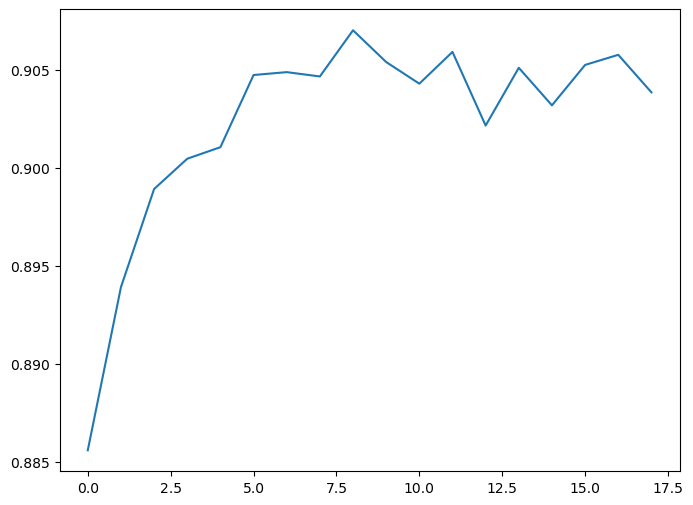

In [63]:
col = []
ac = []
for c in imp.index:
    col.append(c)
    ac.append(model_ac(X_train[col], y_train, X_test[col], y_test, model))
    print('Input fields: ', len(col), 'Accuracy: %.2f' % (ac[-1]*100))
ac = pd.Series(ac)
ac.plot()

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
col = []
ac = []
for c in imp.index:
    col.append(c)
    ac.append(model_ac(X_train[col], y_train, X_test[col], y_test, model))
    print('Input fields: ', len(col), 'Accuracy: %.2f' % (ac[-1]*100))
ac = pd.Series(ac)
ac.plot()
    </code>
</details>


## Author


[Yaroslav Vyklyuk, prof., PhD., DrSc](http://vyklyuk.bukuniver.edu.ua/en/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01)


 Copyright &copy; 2021 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0GN4EN438-2022-01-01).
